In [48]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
pd.set_option('display.max_columns', 500)
# read the train and test dataset

# test_data = pd.read_csv('test-data.csv')



In [2]:
train_data = pd.read_csv('run_or_walk.csv')

In [3]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
# print('Shape of testing data :',test_data.shape)



Shape of training data : (88588, 11)


In [4]:
train_data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
train_data.dtypes.value_counts()

float64    6
object     3
int64      2
dtype: int64

In [7]:
train_data1 = train_data.drop(columns=['date','time','username'],axis=1)

In [8]:
train_data1.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [9]:
train_data1.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [10]:
train_data1.isna().sum().value_counts()

0    8
dtype: int64

In [11]:
train_data1['activity'].isna().sum()

0

In [12]:
X_data=train_data1.drop('activity',axis=1)
Y_data=train_data1.activity

In [13]:
X_data_col=X_data.columns

In [14]:
SS=StandardScaler()
X_data_1=SS.fit_transform(X_data)
X_data_1=pd.DataFrame(X_data_1,columns=X_data_col)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data_1,Y_data,test_size=0.25,stratify=Y_data,random_state=0)

In [16]:
train_x = train_data.drop(columns=['activity','date','time','username'],axis=1)
train_y = train_data['activity']

# seperate the independent and target variable on testing data
#test_x = test_data.drop(columns=['activity'],axis=1)
#test_y = test_data['activity']

In [17]:
print(X_train.shape)
print(X_test.shape)

(66441, 7)
(22147, 7)


In [18]:
dt = tree.DecisionTreeClassifier(random_state=0) #creating decision tree object 1 with default parameters
#Train the model using the training sets
dt.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [19]:
dt1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=0) 
#Train the model using the training sets
dt1.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred1 = dt1.predict(X_test)

#creating decision tree model 3 by changing more values
dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=2, random_state=0)
dt2.fit(X_train, Y_train)
y_pred2 = dt2.predict(X_test)

In [20]:
print ('Accuracy M1:',metrics.accuracy_score(Y_test,y_pred))
print ('Accuracy M2:',metrics.accuracy_score(Y_test,y_pred1))
print ('Accuracy M3:',metrics.accuracy_score(Y_test,y_pred2))

Accuracy M1: 0.9846028807513433
Accuracy M2: 0.9584142321759155
Accuracy M3: 0.9152029620264596


In [21]:
result=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
result.head()

,Actual,Predicted
54498,1,1
59761,1,1
72683,1,1
14239,1,1
77473,0,0


In [23]:
result1=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred1})
result1.head()

,Actual,Predicted
54498,1,1
59761,1,1
72683,1,1
14239,1,1
77473,0,0


In [24]:
param_grid = {"max_depth": [1, 2,3,5],
              "min_samples_leaf":[2,3,4,5]}

# run grid search
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 4}

In [ ]:
## decision tree

In [55]:

param_grid = {"max_depth": [2,3,4,5],
              "max_features": [0,1],
              "min_samples_split": [2, 3, 5, 10],
              "criterion": ["gini", "entropy"], 
              "min_samples_leaf":[4,10,50],
              "random_state": [1,10,100]}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
# run grid search
grid_search = DecisionTreeClassifier(criterion='gini', splitter='best', random_state =0,max_depth=5)
grid_search.fit(X_train, Y_train)
grid_search.get_params(deep=True)



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [56]:
param_grid = {"max_depth": [2,3,4,5],
              "max_features": [0,1],
              "min_samples_split": [2, 3, 5, 10],
              "criterion": ["gini", "entropy"], 
              "min_samples_leaf":[4,10,50],
              "random_state": [1,10,100]}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
# run grid search
grid_search = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state =0,max_depth=5)
grid_search.fit(X_train, Y_train)
grid_search.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [58]:
dt_grid = tree.DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1, random_state=0)

dt_grid.fit(X_train, Y_train)

pred = dt_grid.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(Y_test,pred))

Accuracy: 0.9678963290739152


In [66]:
#feature importance for model 1
dt.feature_importances_

array([0.00947209, 0.04273153, 0.53449872, 0.34201958, 0.01825793,
       0.00906996, 0.04395019])

In [60]:
#feature importance for model 2
dt1.feature_importances_

array([0.        , 0.        , 0.60370711, 0.37338263, 0.        ,
       0.        , 0.02291026])

In [61]:
#feature importance for model 3
dt2.feature_importances_

array([0.        , 0.        , 0.71805579, 0.28194421, 0.        ,
       0.        , 0.        ])

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11056
           1       0.99      0.98      0.98     11091

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147



# We can see that the prediction is 98%  accurate

In [63]:
print(dict(zip(X_train.columns, dt2.feature_importances_)))

{'wrist': 0.0, 'acceleration_x': 0.0, 'acceleration_y': 0.7180557857481255, 'acceleration_z': 0.28194421425187444, 'gyro_x': 0.0, 'gyro_y': 0.0, 'gyro_z': 0.0}


## We can see that Left wrist has more importance

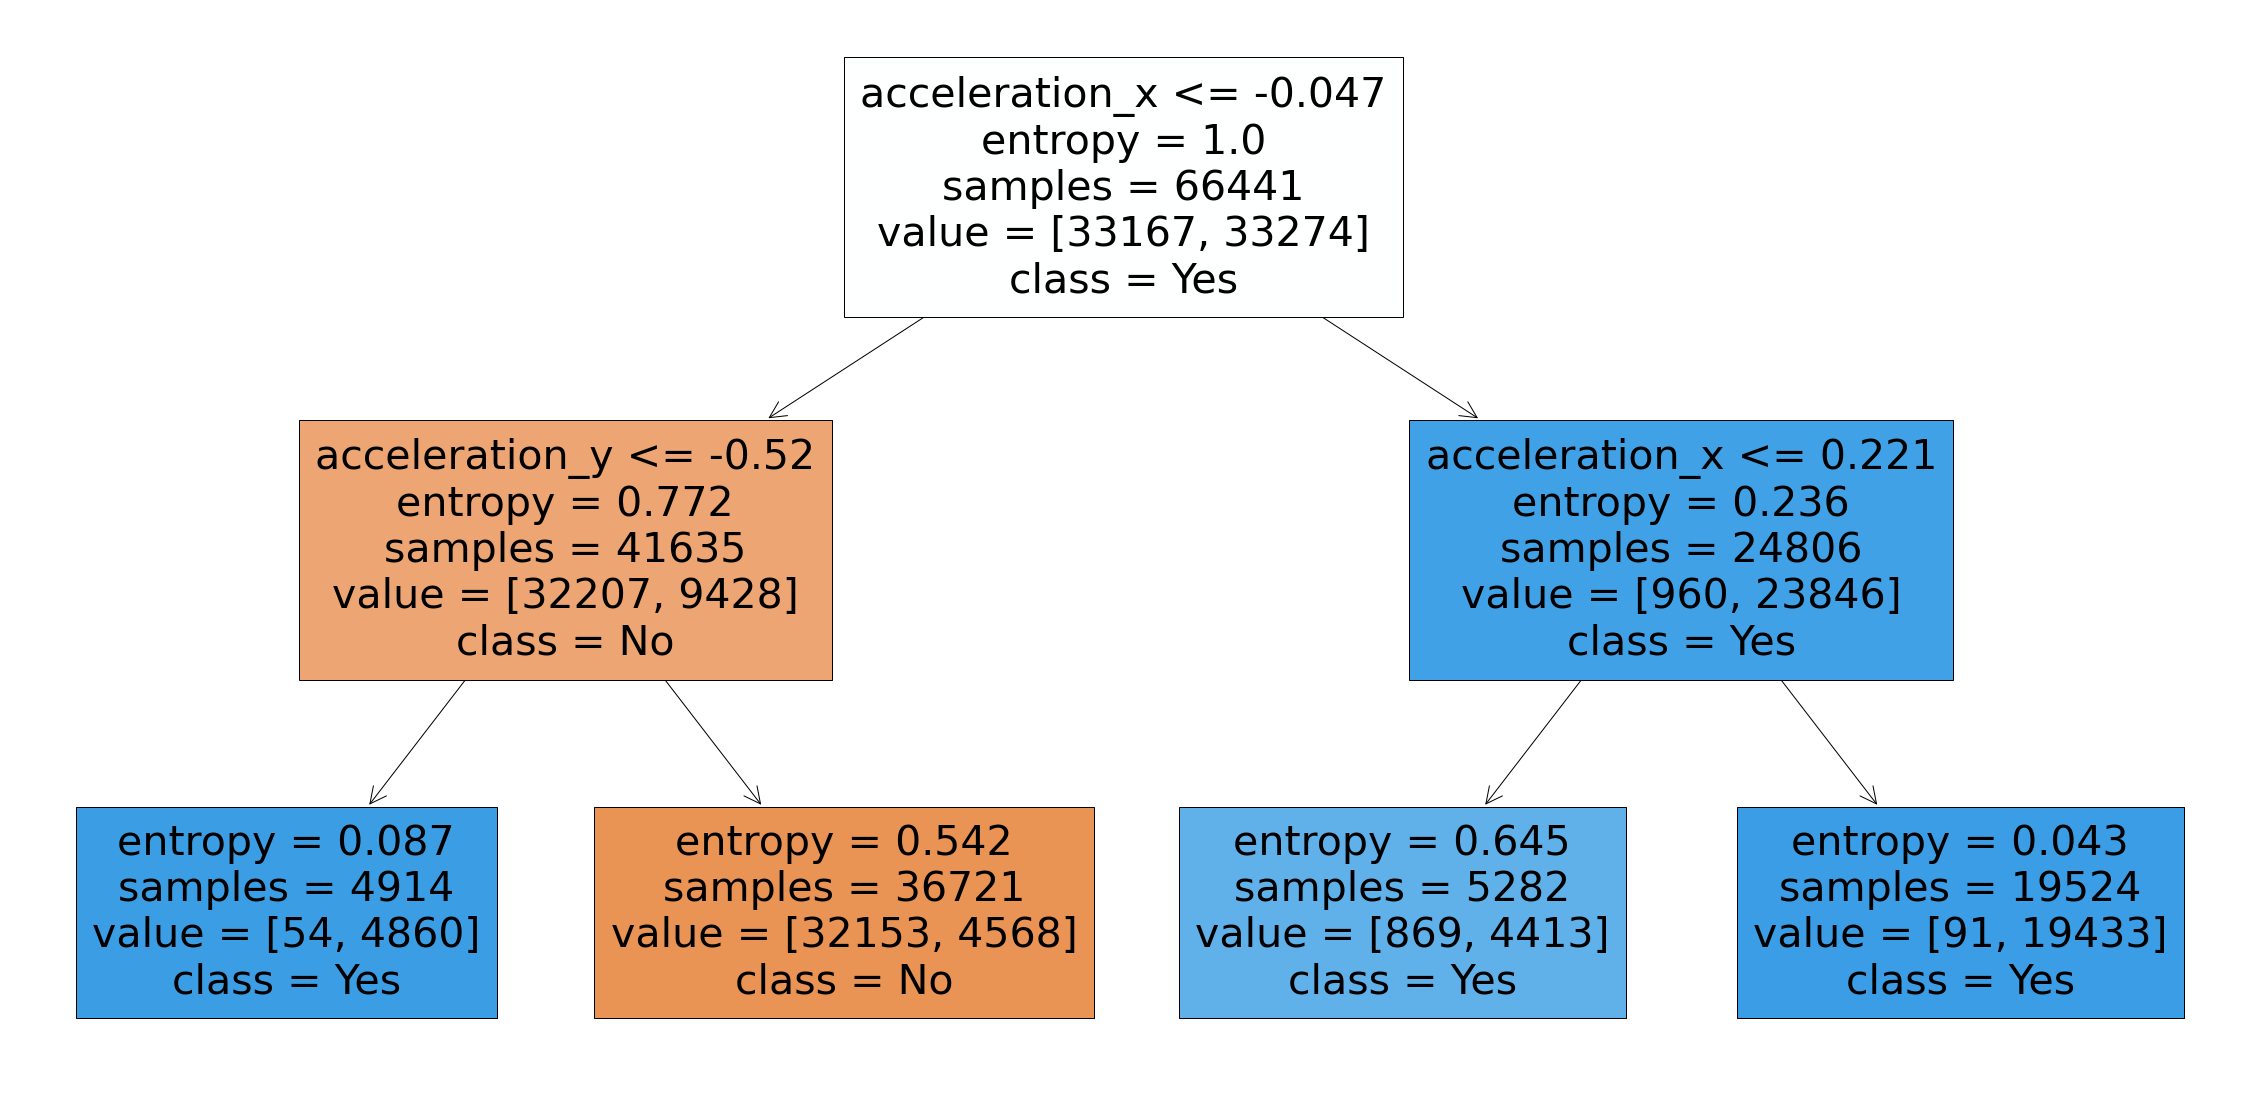

In [64]:
plt.figure(figsize=(40,20))
plot_tree(dt2,class_names=['No','Yes'],feature_names=train_data1.columns,filled=True)
plt.show()


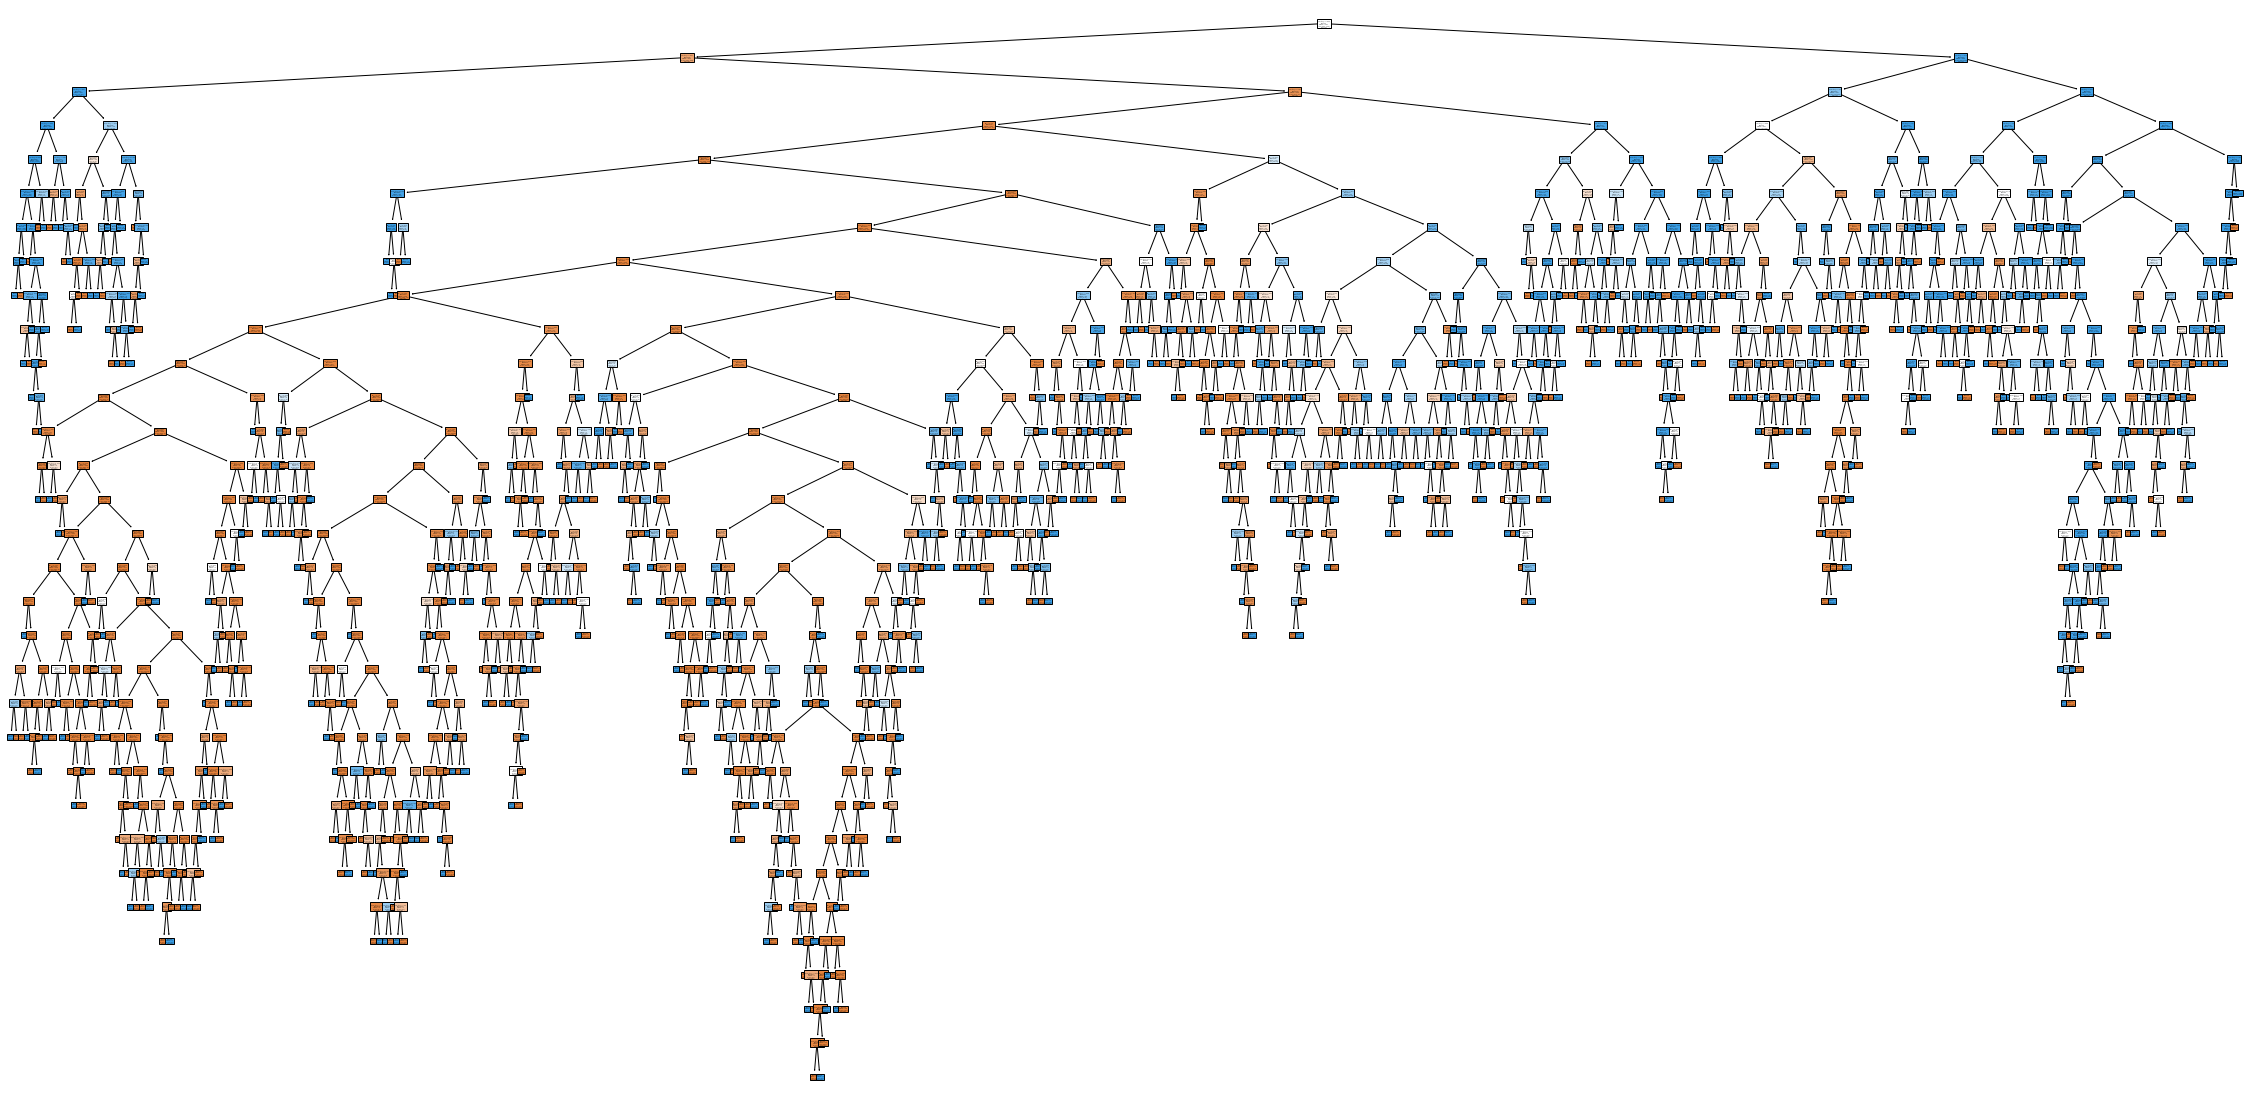

In [96]:
plt.figure(figsize=(40,20))
plot_tree(dt,class_names=['No','Yes'],feature_names=train_data1.columns,filled=True)
plt.show()

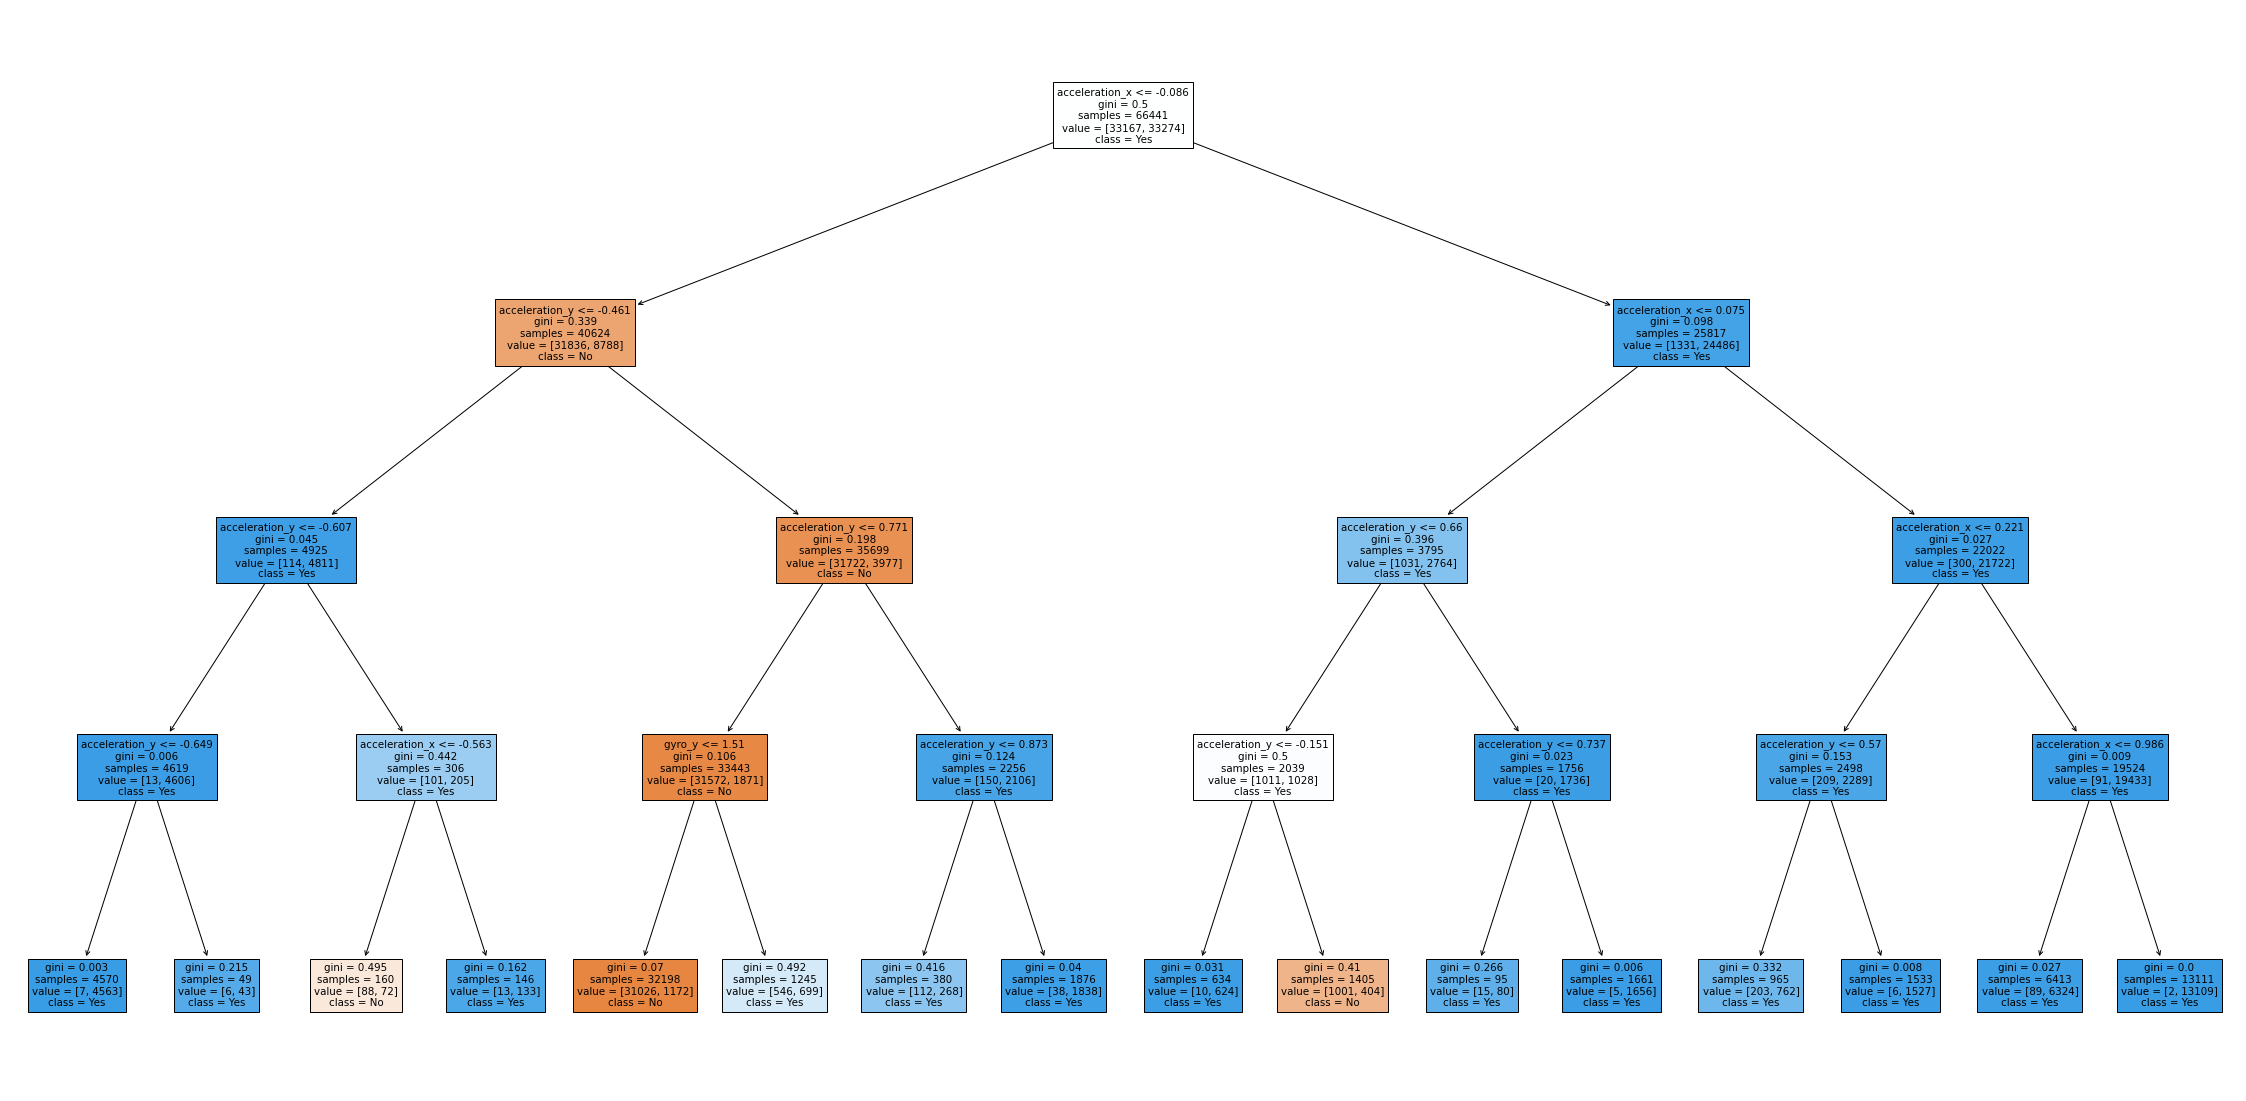

In [97]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=['No','Yes'],feature_names=train_data1.columns,filled=True)
plt.show()

In [68]:
import pickle
model = 'dt_model.pkl'      #name of the pickle file
pickle.dump(dt2, open(model, 'wb'))  #saving the dt2 model using dump function

In [69]:
load_model=pickle.load(open(model,'rb'))

In [70]:
prediction=load_model.predict(X_test)
prediction

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

# Ensemble - Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# build a classifier
rf = RandomForestClassifier()

#Train the model using the training sets
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [72]:
y_pred = rf.predict(X_test)

In [73]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9920079469002574
Precision: 0.9912675549153763
Recall: 0.9927869443693085


In [107]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [75]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
#scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
# run grid search
grid_search=GridSearchCV(rf,param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring='accuracy', refit='AUC', return_train_score=True)
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(2, 403, 10)}, refit='AUC',
             return_train_score=True, scoring='accuracy')

In [78]:
grid_search.best_score_

0.9912403401907369

In [81]:
rf_grid_search = RandomForestClassifier(n_estimators=100, bootstrap = False , criterion = 'entropy', min_samples_split = 2)

#Train the model using the training sets with best of Grid search
rf_grid_search.fit(X_train, Y_train)

#Predict the response for test dataset with best of Grid search
y_pred = rf_grid_search.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9925046281663431
Precision: 0.9924276570810421
Recall: 0.9926066179785411


In [82]:
from xgboost import XGBRegressor

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9917821826884002


In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[11008    48]
 [  134 10957]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11056
           1       1.00      0.99      0.99     11091

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [98]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_data,Y_data,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy_rate')

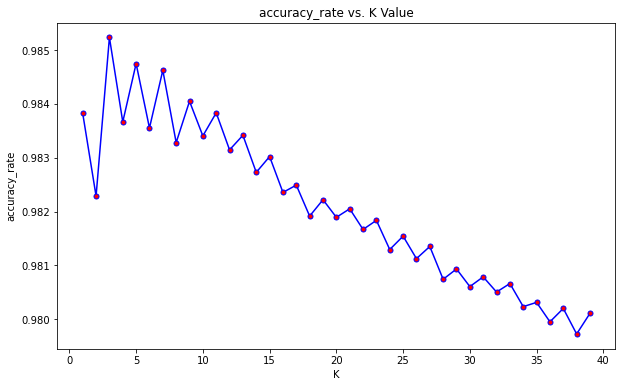

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', marker='.',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print("Accuracy:",metrics.accuracy_score(Y_test, pred))

WITH K=3
Accuracy: 0.9921885582697431


In [106]:
#Support vector Classifier

from sklearn.svm import SVC
Support_Vector_Classifier=SVC(C=2.0,kernel='rbf')
Support_Vector_Classifier.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = Support_Vector_Classifier.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
print ('Accuracy:',accuracy_score(Y_test,y_pred))

Accuracy: 0.9918273355307716


In [109]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


In [110]:
print ('Accuracy:',accuracy_score(Y_test,y_pred))

Accuracy: 0.9566984241658012


In [76]:


model = GaussianNB()

# fit the model with the training data
model.fit(X_train, Y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(Y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset


Target on train data [1 0 1 ... 1 0 0]
accuracy_score on train dataset :  0.9567435770081727


In [87]:
train_data1.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
